## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
#from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Projeção e reprojeção

In [2]:
np.random.seed(2)
x,y = make_classification(n_features=3, n_redundant=0, n_informative=3,n_clusters_per_class=1, n_classes=1, n_samples=200)

#Transformação PCA
pca = PCA(n_components=2)
pca.fit(x)
proj_x = pca.transform(x)
reproj_x = pca.inverse_transform(proj_x)

## Visualização do processo

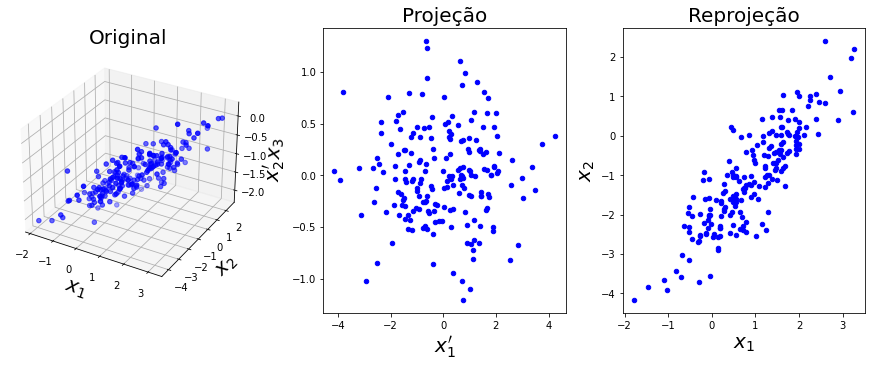

In [3]:
FS = (12,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)


#Subgráfico: dado original
ax = fig.add_subplot(spec[0, 0] , projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='o', c='blue', s=20)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)
ax.set_title('Original',fontsize=20)

#Subgráfico: dados projetados (eixos ortogonais)
ax = fig.add_subplot(spec[0, 1])
ax.scatter(proj_x[:, 0], proj_x[:, 1], marker='o', c='blue', s=20)
ax.set_xlabel('$x_1^\prime$', fontsize=20)
ax.set_ylabel('$x_2^\prime$', fontsize=20)
ax.set_title('Projeção',fontsize=20)
# ax.scatter(proj_x[:, 0], proj_x[:, 1], proj_x[:, 2], marker='o', c='blue', s=20)
# ax.set_xlabel('$xl_1$', fontsize=20)
# ax.set_ylabel('$xl_2$', fontsize=20)
# ax.set_zlabel('$xl_3$', fontsize=20)
# ax.set_title('Original',fontsize=20)

#Subgráfico: dados reprojetados (espaço original)
ax = fig.add_subplot(spec[0, 2] )
ax.scatter(reproj_x[:, 0], reproj_x[:, 1], marker='o', c='blue', s=20)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_title('Reprojeção',fontsize=20)

#plt.savefig('projPCA.png',dpi=300)
plt.show()

In [10]:
print('Vetor médio: ', pca.mean_)
print('Eixos/componentes: ',pca.components_)
print('Autovalores: ',pca.explained_variance_)
print(pca.explained_variance_[0]/np.sum(pca.explained_variance_))

Vetor médio:  [ 0.90299845 -1.07039761 -1.03876576]
Eixos/componentes:  [[-0.57760735 -0.7854809  -0.22223749]
 [-0.63655426  0.603836   -0.47977158]]
Autovalores:  [2.36160718 0.19942642]
0.9221304945971791


### Análise sobre a redução do número de atributos

In [4]:
#Transformação PCA
pca3 = PCA(n_components=3)
pca3.fit(x)
proj_x3 = pca3.transform(x)
invProj3 = pca3.inverse_transform(proj_x3)


#Transformação PCA
pca2 = PCA(n_components=2)
pca2.fit(x)
proj_x2 = pca2.transform(x)
invProj2 = pca2.inverse_transform(proj_x2)

In [5]:
print("Apenas uma comparação sobre a dimensão dos dados antes/após reprojeção")
print("pca3",proj_x3.shape)
print("pca2",proj_x2.shape)
print("pca3",invProj3.shape)
print("pca2",invProj2.shape)

print("\n")
print("Variância explicada: ",pca3.explained_variance_)
print("Variância explicada do 1o atributo: ",pca3.explained_variance_[0]/np.sum(pca3.explained_variance_))
print("Razão da variância explicada: ",pca3.explained_variance_ratio_)
print("Soma acumulada das variâncias explicadas: ",np.cumsum(pca3.explained_variance_ratio_))

Apenas uma comparação sobre a dimensão dos dados antes/após reprojeção
pca3 (200, 3)
pca2 (200, 2)
pca3 (200, 3)
pca2 (200, 3)


Variância explicada:  [2.36160718 0.19942642 0.07137064]
Variância explicada do 1o atributo:  0.8971293781916101
Razão da variância explicada:  [0.89712938 0.07575828 0.02711234]
Soma acumulada das variâncias explicadas:  [0.89712938 0.97288766 1.        ]
